In [15]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import preprocess_input
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import tensorflow as tf
# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
else:
    print("GPU is NOT available.")

GPU is available.


In [18]:

IMAGE_SIZE = [224, 224]


train_path = '/content/drive/MyDrive/MountainGlacierWork/Train/'
valid_path = '/content/drive/MyDrive/MountainGlacierWork/Test/'

# add preprocessing layer to the front of VGG
mbnt = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [20]:

folders = glob('/content/drive/MyDrive/MountainGlacierWork/Train/*')
print(len(folders))

2


In [21]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(50, activation='relu')(x)
x = Dense(50, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [22]:
model = Model(inputs=mbnt.input, outputs=prediction)

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MountainGlacierWork/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MountainGlacierWork/Test/',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2018 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


In [25]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
32/32 [==============================] - 628s 20s/step - loss: 0.9529 - accuracy: 0.7369 - val_loss: 0.3616 - val_accuracy: 0.8664
Epoch 2/10
32/32 [==============================] - 42s 1s/step - loss: 0.3770 - accuracy: 0.8513 - val_loss: 0.4015 - val_accuracy: 0.8395
Epoch 3/10
32/32 [==============================] - 39s 1s/step - loss: 0.3211 - accuracy: 0.8776 - val_loss: 0.3702 - val_accuracy: 0.8497
Epoch 4/10
32/32 [==============================] - 38s 1s/step - loss: 0.2959 - accuracy: 0.8816 - val_loss: 0.3942 - val_accuracy: 0.8544
Epoch 5/10
32/32 [==============================] - 37s 1s/step - loss: 0.2444 - accuracy: 0.9034 - val_loss: 0.4060 - val_accuracy: 0.8516
Epoch 6/10
32/32 [==============================] - 41s 1s/step - loss: 0.2196 - accuracy: 0.9187 - val_loss: 0.3904 - val_accuracy: 0.8525
Epoch 7/10
32/32 [==============================] - 43s 1s/step - loss: 0.2458 - accuracy: 0.9024 - val_loss: 0.5114 - val_accuracy: 0.8256
Epoch 8/10
32/32 [

In [26]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/MountainGlacierWork/Test/",
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')



Found 1078 images belonging to 2 classes.


In [27]:
pred = model.predict(test_set)
print(pred)

17/17 [==============================] - 7s 313ms/step
[[0.68430245 0.31569758]
 [0.5040689  0.49593112]
 [0.02479932 0.97520065]
 ...
 [0.9945063  0.00549367]
 [0.9951871  0.00481297]
 [0.31639835 0.6836017 ]]


In [29]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.1 MB/s eta 0:00:00


In [75]:
import xlsxwriter
import os
workbook = xlsxwriter.Workbook('/content/drive/MyDrive/MountainGlacier/output/ImagesAnalysis.xlsx')
worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("ImageName"))
worksheet1.write(row, 1, str("Actual Class Code"))
worksheet1.write(row, 2, str("Actual Class Name"))
worksheet1.write(row, 3, str("Predicted Result"))
worksheet1.write(row, 4, str("Class Code Based on Predicted Result"))
worksheet1.write(row, 5, str("Predicted Class Name"))
worksheet1.write(row, 6, str("CF-Measure"))

# importing the modules
import os
import shutil
# Providing the folder path
origin = '/content/drive/MyDrive/MountainGlacierWork/Test/mountain/'
target1 = '/content/drive/MyDrive/MountainGlacier/TestCheck/mountain/'

# Fetching the list of all the files
files = os.listdir(origin)
print(files)
actual=[]
predicted=[]
ac=[]
pr=[]
# Fetching all the files to directory
row=1
for file_name in files:
    print("Original" + str(origin+file_name))
    print("Copied" + str(target1+file_name))
    shutil.copy(origin+file_name, target1+file_name)

    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MountainGlacier/TestCheck/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
    images,cls = next(test_set)
    filme=test_set.filenames
    #plt.imshow(images[0])
    worksheet1.write(row, 0, str(filme[0]))
    worksheet1.write(row, 1, str(cls[0]))
    worksheet1.write(row, 2, str("Mountain"))
    print("Actual")
    print(cls[0])
    print(cls[0][0])
    print(cls[0][1])
    actual.append(cls[0])
    ac.append("Mountain")
    print(filme[0])
    pred = model.predict(test_set)
    worksheet1.write(row, 3, str(pred))
    print("Predicted")
    print(pred)
    print(pred[0][0])
    print(pred[0][1])
    if(pred[0][0]>pred[0][1]):
        predicted.append([1.0,0.0])
        worksheet1.write(row, 4, str("[1.0,0.0]"))
        worksheet1.write(row, 5, str("Glacier"))
        worksheet1.write(row, 6, str("False Glacier"))
        pr.append("Glacier")
        print("Glacier")
    else:
        predicted.append([0.0,1.0])
        worksheet1.write(row, 4, str("[0.0,1.0]"))
        worksheet1.write(row, 5, str("Mountain"))
        worksheet1.write(row, 6, str("True Mountain"))
        pr.append("Mountain")
        print("Mountain")
    print("======================")
    path = r"/content/drive/MyDrive/MountainGlacier/TestCheck/mountain/"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            print('Deleting file:', fi)
            os.remove(fi)
    row=row+1
print("Files are copied successfully")


Streaming output truncated to the last 5000 lines.
Predicted
[[0.05260474 0.94739527]]
0.052604742
0.94739527
Mountain
Deleting file: /content/drive/MyDrive/MountainGlacier/TestCheck/mountain/21819.jpg
Original/content/drive/MyDrive/MountainGlacierWork/Test/mountain/21826.jpg
Copied/content/drive/MyDrive/MountainGlacier/TestCheck/mountain/21826.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
mountain/21826.jpg
1/1 [==============================] - 0s 43ms/step
Predicted
[[3.817702e-04 9.996182e-01]]
0.0003817702
0.9996182
Mountain
Deleting file: /content/drive/MyDrive/MountainGlacier/TestCheck/mountain/21826.jpg
Original/content/drive/MyDrive/MountainGlacierWork/Test/mountain/21829.jpg
Copied/content/drive/MyDrive/MountainGlacier/TestCheck/mountain/21829.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
mountain/21829.jpg
1/1 [==============================] - 0s 64ms/step
Predicted
[[0.3587981  0.64120185]]
0.3587981
0.64120185
Mountain
Deleting file

In [76]:
import os
import shutil
# Providing the folder path
origin = '/content/drive/MyDrive/MountainGlacierWork/Test/glacier/'
target1 = '/content/drive/MyDrive/MountainGlacier/TestCheck/glacier/'

# Fetching the list of all the files
files = os.listdir(origin)

# Fetching all the files to directory
for file_name in files:
    shutil.copy(origin+file_name, target1+file_name)
    print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MountainGlacier/TestCheck/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
    images,cls = next(test_set)
    filme=test_set.filenames

    #plt.imshow(images[0])
    worksheet1.write(row, 0, str(filme[0]))
    worksheet1.write(row, 1, str(cls[0]))
    worksheet1.write(row, 2, str("Glacier"))
    print("Actual")
    print(cls[0])
    print(cls[0][0])
    print(cls[0][1])
    actual.append(cls[0])
    ac.append("Glacier")
    print(filme[0])
    pred = model.predict(test_set)
    worksheet1.write(row, 3, str(pred))
    print("Predicted")
    print(pred)
    print(pred[0][0])
    print(pred[0][1])
    if(pred[0][0]>pred[0][1]):
        predicted.append([1.0,0.0])
        worksheet1.write(row, 4, str("[1.0,0.0]"))
        worksheet1.write(row, 5, str("Glacier"))
        worksheet1.write(row, 6, str("True Glacier"))
        pr.append("Glacier")
    else:
        predicted.append([0.0,1.0])
        worksheet1.write(row, 4, str("[0.0,1.0]"))
        worksheet1.write(row, 5, str("Mountain"))
        worksheet1.write(row, 6, str("False Mountain"))
        pr.append("Mountain")
    path = r"/content/drive/MyDrive/MountainGlacier/TestCheck/glacier/"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            print('Deleting file:', fi)
            os.remove(fi)
    row=row+1
print("Files are copied successfully")
workbook.close()

Streaming output truncated to the last 5000 lines.
glacier/23392.jpg
1/1 [==============================] - 0s 43ms/step
Predicted
[[9.994956e-01 5.043686e-04]]
0.9994956
0.0005043686
Deleting file: /content/drive/MyDrive/MountainGlacier/TestCheck/glacier/23392.jpg
Original/content/drive/MyDrive/MountainGlacierWork/Test/glacier/23398.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
glacier/23398.jpg
1/1 [==============================] - 0s 44ms/step
Predicted
[[9.9901724e-01 9.8273379e-04]]
0.99901724
0.0009827338
Deleting file: /content/drive/MyDrive/MountainGlacier/TestCheck/glacier/23398.jpg
Original/content/drive/MyDrive/MountainGlacierWork/Test/glacier/23418.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
glacier/23418.jpg
1/1 [==============================] - 0s 53ms/step
Predicted
[[0.9971691  0.00283093]]
0.9971691
0.0028309317
Deleting file: /content/drive/MyDrive/MountainGlacier/TestCheck/glacier/23418.jpg
Original/content/drive/MyDrive/Mo

In [77]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       553
           1       0.87      0.84      0.85       525

   micro avg       0.86      0.86      0.86      1078
   macro avg       0.86      0.86      0.86      1078
weighted avg       0.86      0.86      0.86      1078
 samples avg       0.86      0.86      0.86      1078



In [78]:
from sklearn.metrics import classification_report
print(classification_report(ac,pr))

              precision    recall  f1-score   support

     Glacier       0.85      0.88      0.86       553
    Mountain       0.87      0.84      0.85       525

    accuracy                           0.86      1078
   macro avg       0.86      0.86      0.86      1078
weighted avg       0.86      0.86      0.86      1078



In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ac, pr)
cm

array([[485,  68],
       [ 86, 439]])

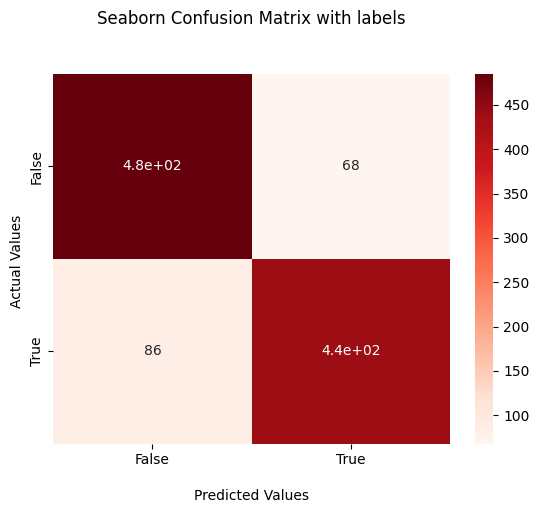

In [80]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

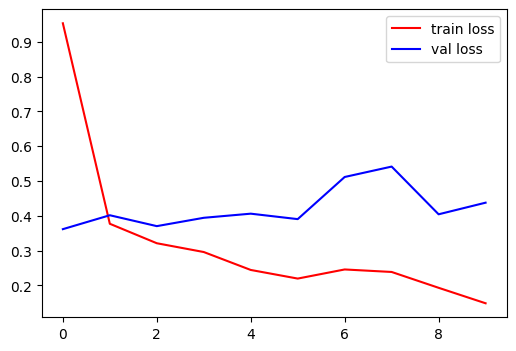

In [81]:
# loss
plt.figure(figsize=(6,4))
plt.plot(r.history['loss'], label='train loss', color="red")
plt.plot(r.history['val_loss'], label='val loss', color="blue")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

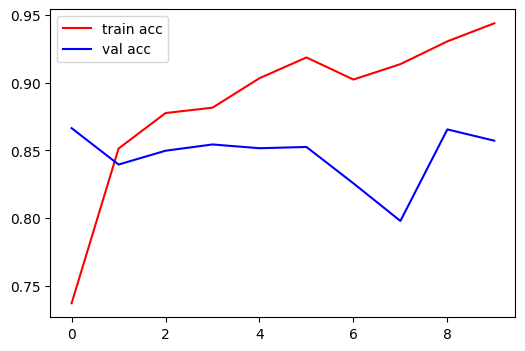

In [82]:
# accuracies
plt.figure(figsize=(6,4))
plt.plot(r.history['accuracy'], label='train acc', color="red")
plt.plot(r.history['val_accuracy'], label='val acc', color="blue")
plt.legend()
#plt.bar(r.history['accuracy'],height = 1.0)

plt.show()
#plt.savefig('AccVal_acc')


In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual, predicted)

In [85]:
mae

0.14285714285714285

In [93]:
prN=pr

In [97]:
prnumeric = [0 if value == 'Glacier' else 1 for value in prN]

In [100]:
acN=ac

In [101]:
acnumeric = [0 if value == 'Glacier' else 1 for value in acN]

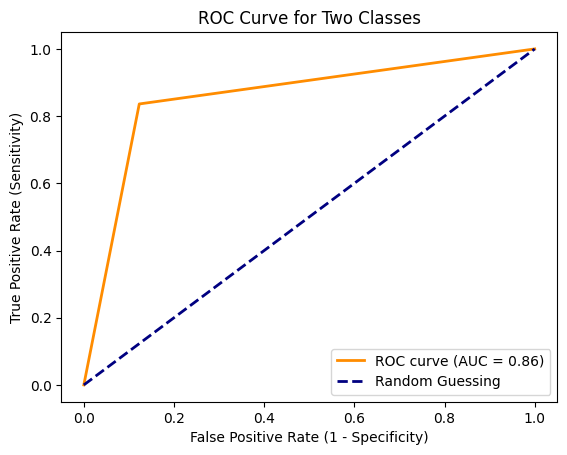

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

fpr, tpr, thresholds = roc_curve(acnumeric, prnumeric)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Two Classes')
plt.legend(loc='lower right')

# Show the plot
plt.show()


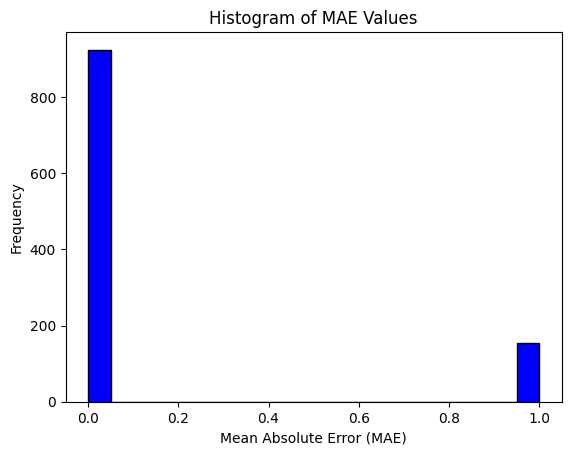

In [107]:
mae_values = [abs(a - p) for a, p in zip(acnumeric, prnumeric)]

# Create a histogram
plt.hist(mae_values, bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Frequency')
plt.title('Histogram of MAE Values')

# Show the plot
plt.show()

In [109]:
np.save('/content/drive/MyDrive/MountainGlacier/output/HistoryDenseHillNet.npy', r.history)

In [112]:
model.save("/content/drive/MyDrive/MountainGlacier/output//ModelDenseHillNet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/MountainGlacier/output/JupyterDenseHillNetMoreImages.ipynb

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/MountainGlacier/output/JupyterDenseHillNetMoreImages.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.